In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
filename = "players.csv"

In [3]:
data = pd.read_csv(filename)

In [4]:
data.head(5)

,"Ranking,Name,ELO,PlayedGames"
0,"1,YT:DanTheMan,312.0,2394"
1,"2,YouTube:azasiterri,275.4,3791"
2,"3,[wire]QueeringTheMap,273.2,1459"
3,"4,[Corgi]Ressemblance,271.8,515"
4,"5,DanTheMan,257.3,440"


In [52]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

np.array(data.T[2][0].split(",")[-2:]).astype(float)

array([ 273.2, 1459. ])

In [53]:
DATA = np.array([np.array(data.T[i][0].split(",")[-2:]).astype(float) for i in range(len(data))])

In [7]:
DATA

array([[3.120e+02, 2.394e+03],
       [2.754e+02, 3.791e+03],
       [2.732e+02, 1.459e+03],
       ...,
       [0.000e+00, 4.000e+00],
       [0.000e+00, 2.000e+00],
       [0.000e+00, 9.000e+00]])

In [8]:
Y, X = DATA.T

In [9]:
X

array([2.394e+03, 3.791e+03, 1.459e+03, ..., 4.000e+00, 2.000e+00,
       9.000e+00])

In [10]:
Y

array([312. , 275.4, 273.2, ...,   0. ,   0. ,   0. ])

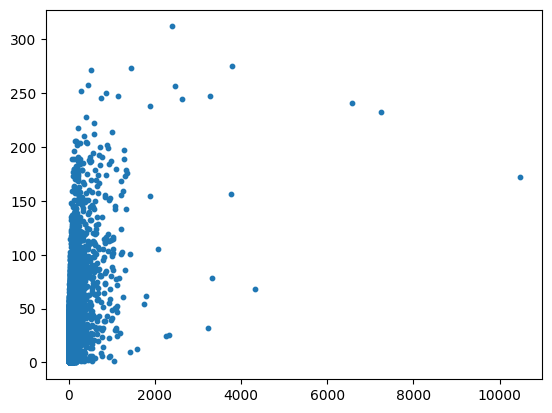

In [11]:
plt.scatter(X, Y, s=10)

In [12]:
X_1 = np.delete(X, np.argmax(X))
Y_1 = np.delete(Y, np.argmax(X))

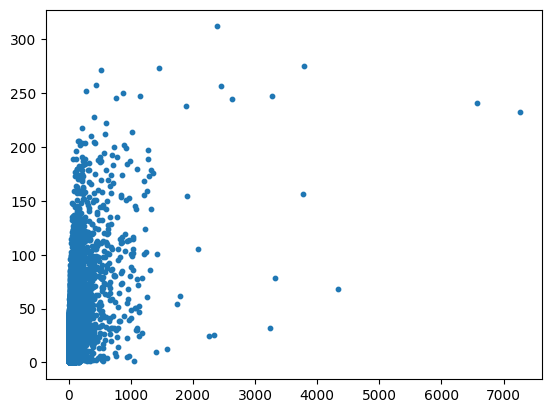

In [13]:
plt.scatter(X_1, Y_1, s=10)

In [14]:
X_2 = np.delete(X_1, np.argmax(X_1))
Y_2 = np.delete(Y_1, np.argmax(X_1))

for i in range(20):
	X_2 = np.delete(X_2, np.argmax(X_2))
	Y_2 = np.delete(Y_2, np.argmax(X_2))

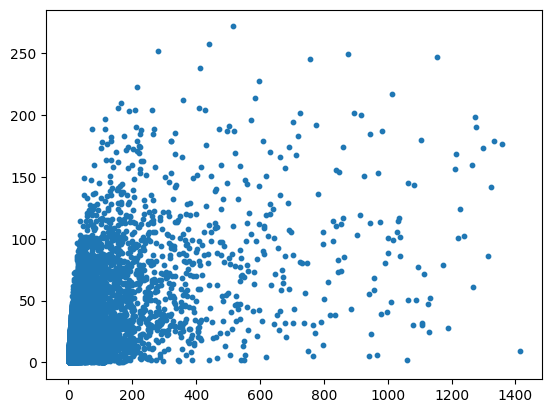

In [15]:
plt.scatter(X_2, Y_2, s=10)

In [16]:
correlation = np.corrcoef(X_2, Y_2)[0, 1]
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.6139564459645959


In [17]:
from scipy.stats import linregress

In [18]:

def regression_scatter(x, y, s=10, text="Elo by Games Played", c1="blue", c2="red", start_0=True, ):
	x_values = np.array([min(x), max(x)])
	if start_0:
		slope, _ = np.polyfit(x, y, 1)
		y_values = slope * x_values
	else:
		slope, intercept, _, _, _ = linregress(x, y)
		y_values = slope * x_values + intercept

	plt.scatter(x, y, s=s, color=c1)
	plt.plot(x_values, y_values, color=c2)

	plt.xlabel('Games Played')
	plt.ylabel('Elo')
	plt.title(text)

	plt.text(max(x)//2, max(max(y), max(y_values)), "Correlation: " + str(round(np.corrcoef(x, y)[0][1], 2)), color="red")
	
	plt.show()

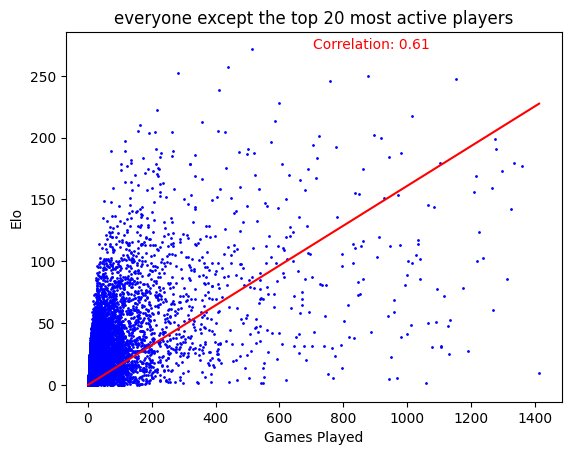

In [19]:
regression_scatter(X_2, Y_2, 1, text="everyone except the top 20 most active players", start_0=True)

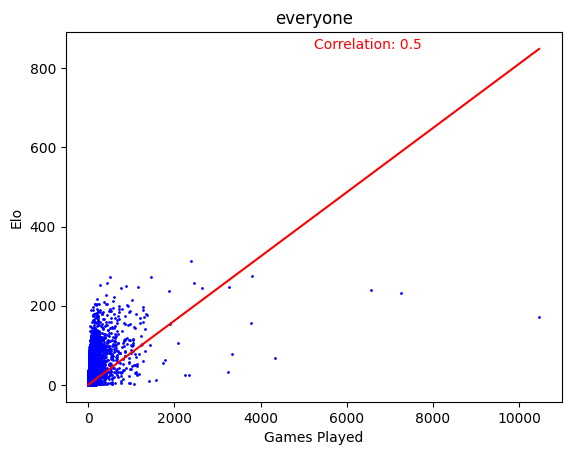

In [20]:
regression_scatter(X, Y, 1, text="everyone", start_0=True)

In [21]:
X_3 = np.delete(X, np.argmin(X))
Y_3 = np.delete(Y, np.argmin(X))

for i in range(len(X) - 1001):
	X_3 = np.delete(X_3, np.argmin(X_3))
	Y_3 = np.delete(Y_3, np.argmin(X_3))

In [22]:
len(X_3)

1000

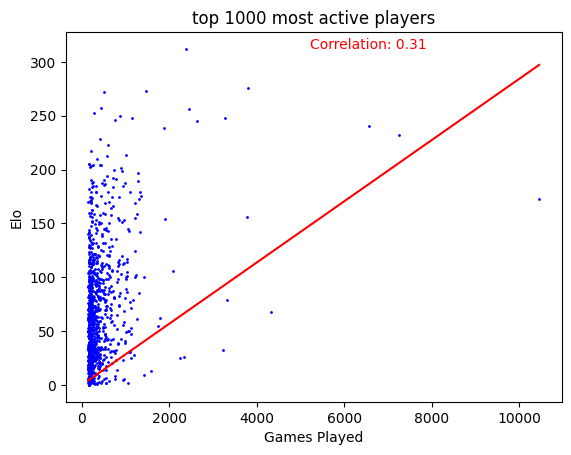

In [23]:
regression_scatter(X_3, Y_3, 1, text="top 1000 most active players", start_0=True)

In [24]:
X_4 = np.delete(X_3, np.argmax(X_3))
Y_4 = np.delete(Y_3, np.argmax(X_3))

for i in range(19):
	X_4 = np.delete(X_4, np.argmax(X_4))
	Y_4 = np.delete(Y_4, np.argmin(X_4))

In [25]:
len(X_4)

980

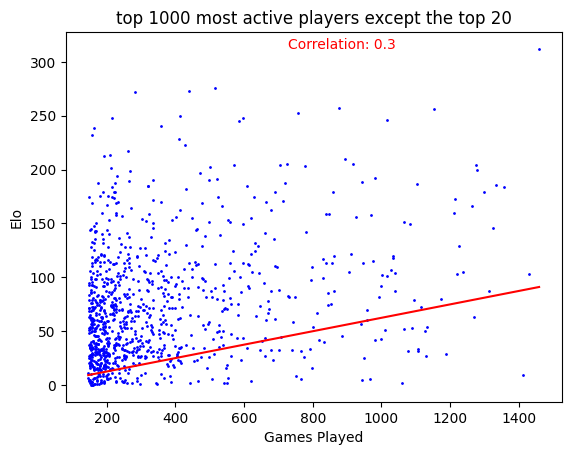

In [26]:
regression_scatter(X_4, Y_4, 1, text="top 1000 most active players except the top 20", start_0=True)

In [27]:
np.mean(Y), np.mean(X)

(8.051464297915954, 12.32968910146908)

In [28]:
X_copy = copy.deepcopy(X)
Y_copy = copy.deepcopy(Y)

In [29]:
Y_copy.sort()

In [30]:
Y_rank = Y_copy[::-1]

Text(0, 0.5, 'Elo')

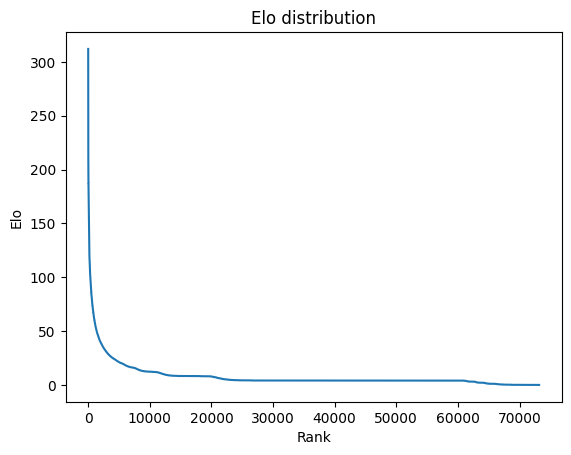

In [31]:
plt.plot(range(len(Y_rank)), Y_rank)
plt.title("Elo distribution")
plt.xlabel("Rank")
plt.ylabel("Elo")

37.7


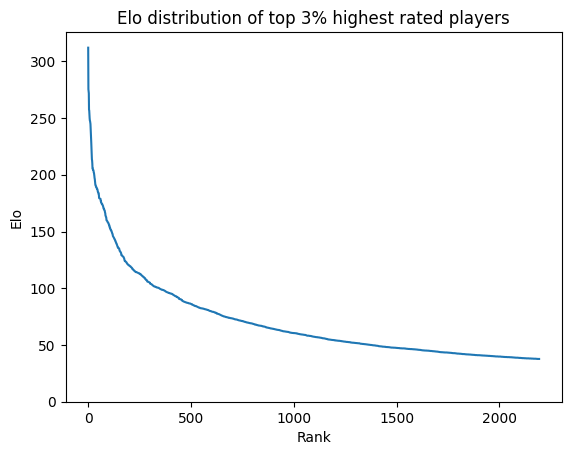

In [32]:
percentile = 3
i=int((percentile/100)*len(Y_rank)) - 1

plt.plot(range(i), Y_rank[:i])

plt.ylim(0)
plt.title(f"Elo distribution of top {percentile}% highest rated players")
plt.xlabel("Rank")
plt.ylabel("Elo")

print(Y_rank[i])

(array([6.5563e+04, 4.7180e+03, 1.3490e+03, 6.0100e+02, 3.1800e+02,
        2.0500e+02, 1.4700e+02, 9.7000e+01, 4.1000e+01, 3.4000e+01,
        2.8000e+01, 2.9000e+01, 1.8000e+01, 1.0000e+01, 3.0000e+00,
        6.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  15.6,  31.2,  46.8,  62.4,  78. ,  93.6, 109.2, 124.8,
        140.4, 156. , 171.6, 187.2, 202.8, 218.4, 234. , 249.6, 265.2,
        280.8, 296.4, 312. ]),
 <BarContainer object of 20 artists>)

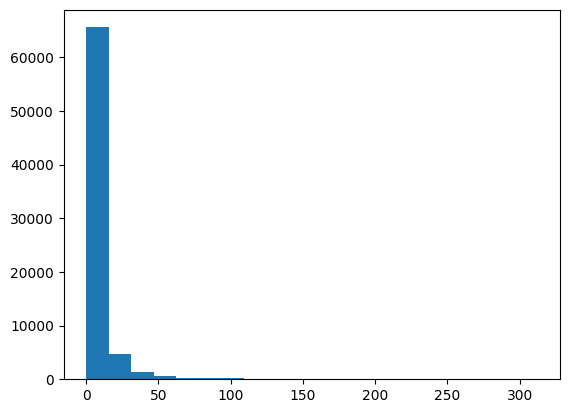

In [33]:
plt.hist(Y, bins=20)

In [34]:
def elo_dist(y, bins, text="Distribution of Elo Ratings"):
	max_y = max(y)
	bin_edges = np.linspace(0, max_y, bins + 1)
	plt.hist(y, bins=bins)
	plt.xlabel('Elo Ratings')
	plt.ylabel('Amount of players in elo range')
	plt.title(text)
	plt.xticks(bin_edges)

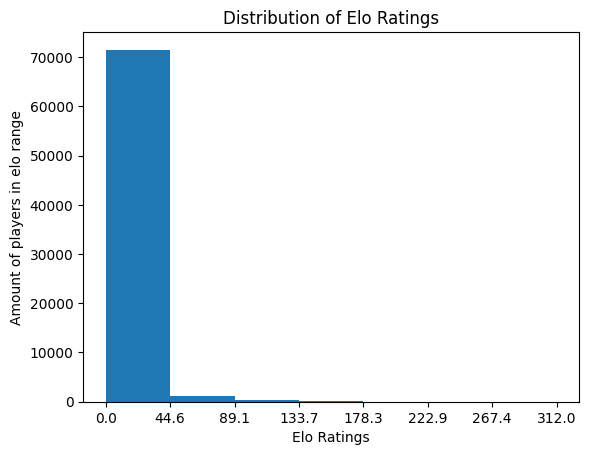

In [35]:
elo_dist(Y, 7)

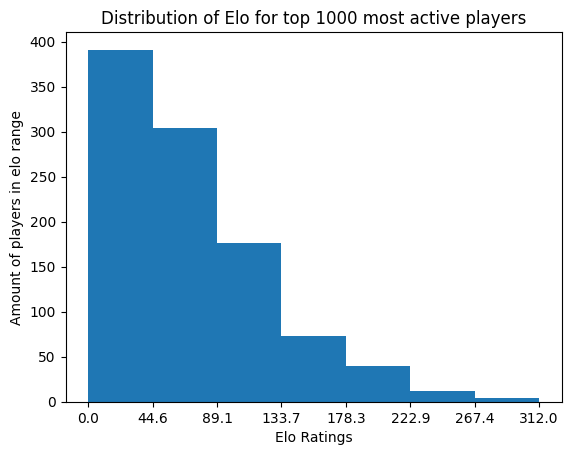

In [36]:
elo_dist(Y_3, 7, text="Distribution of Elo for top 1000 most active players")

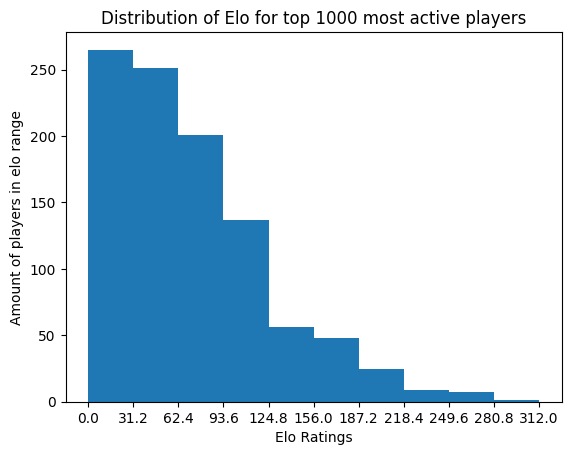

In [37]:
elo_dist(Y_3, 10, text="Distribution of Elo for top 1000 most active players")

37.7


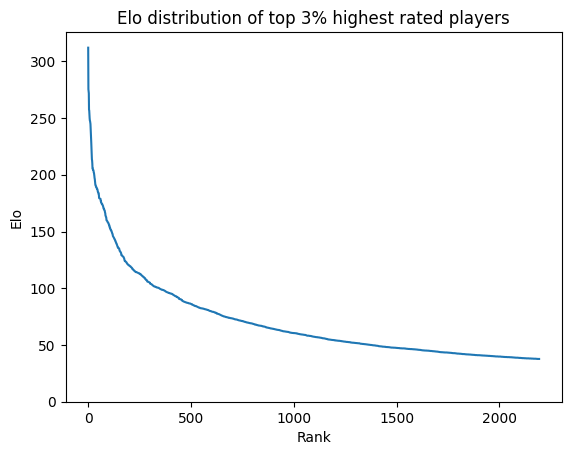

In [38]:
percentile = 3
i=int((percentile/100)*len(Y_rank)) - 1

plt.plot(range(i), Y_rank[:i])

plt.ylim(0)
plt.title(f"Elo distribution of top {percentile}% highest rated players")
plt.xlabel("Rank")
plt.ylabel("Elo")

print(Y_rank[i])

In [39]:
np.median(Y)

4.1

In [40]:
elo_rate = Y/X

In [41]:
elo_rate

array([0.13032581, 0.07264574, 0.18725154, ..., 0.        , 0.        ,
       0.        ])

(array([1.5217e+04, 9.0080e+03, 4.6330e+03, 2.8480e+03, 5.9700e+02,
        4.0799e+04, 5.3000e+01, 1.5000e+01, 1.0000e+00, 4.0000e+00]),
 array([0.  , 0.78, 1.56, 2.34, 3.12, 3.9 , 4.68, 5.46, 6.24, 7.02, 7.8 ]),
 <BarContainer object of 10 artists>)

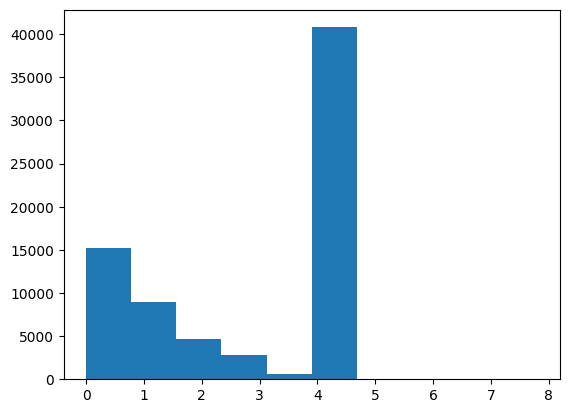

In [42]:
plt.hist(elo_rate, bins=10)

In [43]:
elo_rate_ranked = copy.deepcopy(elo_rate)
elo_rate_ranked.sort()
elo_rate_ranked = elo_rate_ranked[::-1]


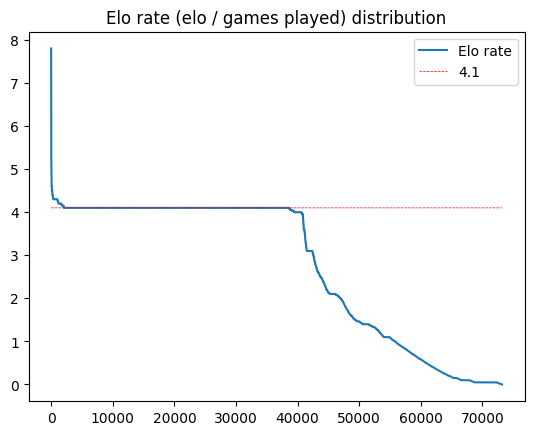

In [44]:
plt.plot(range(len(elo_rate_ranked)), elo_rate_ranked)
plt.plot(range(len(elo_rate_ranked)), [4.1]*len(elo_rate_ranked), linewidth=0.5, linestyle="dashed", color="red")
plt.title("Elo rate (elo / games played) distribution")
plt.legend(["Elo rate", "4.1"])

In [45]:
elo_rate_ranked[65000]

0.1726315789473684

In [46]:
X_sorted = copy.deepcopy(X)
X_sorted.sort()


In [47]:
X_sorted_top = X_sorted[-10000:]

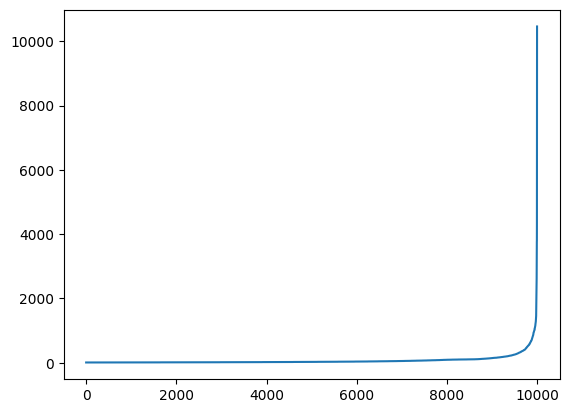

In [48]:
plt.plot(range(len(X_sorted_top)), X_sorted_top)

In [51]:
X_sorted[-1000]

146.0